Loading package / other files

In [2500]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans,DBSCAN
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier

## Classification

In [2501]:
df1= pd.read_csv("clean_dataframe.csv", sep=",")
df=df1.drop(columns=["Country Name"],axis=1)
df

,Agricultural land (% of land area),Current health expenditure per capita (current US$),People practicing open defecation (% of population),Population density (people per sq. km of land area),Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent)
0,-0.075426,-0.497122,-0.069149,-0.191302,-0.095186,-0.191157
1,-0.094538,-0.437213,-0.071810,-0.165346,-0.076579,-0.210042
2,-0.127371,-0.412396,-0.071649,-0.209403,-0.085199,0.061852
3,-0.122356,-0.492666,-0.071687,-0.091639,-0.082912,-0.219611
4,-0.098470,0.474874,-0.071826,-0.140635,-0.065105,-0.219060
...,...,...,...,...,...,...
210,-0.134937,-0.488795,-0.071826,-0.064138,-0.093921,-0.219601
211,-0.057454,-0.410205,-0.071788,0.145184,0.284059,-0.219404
212,-0.093052,1.506289,-0.069038,-0.190130,-0.094471,-0.194329
213,-0.108638,-0.498316,-0.069021,-0.206591,-0.041056,-0.181078


In [2502]:
mean=np.mean(df["Current health expenditure per capita (current US$)"]) #pour savoir la moyenne de la colonne Current health expenditure per capita (current US$)
std=np.std(df["Current health expenditure per capita (current US$)"]) #pour savoir l'écart type de la colonne Current health expenditure per capita (current US$)


In [2503]:
#permet de classer le taux de C02 en 3 classes : faible, normal, élevé
C02=[]
compteur=[0,0,0]
for i in df["Current health expenditure per capita (current US$)"]:
    if i>-0.24:
        compteur[2]+=1
        C02.append("élevé")
    elif i<-0.47:
        compteur[0]+=1
        C02.append("faible")
    else:
        compteur[1]+=1
        C02.append("normal")
print(compteur)
print(C02)

y=df["Current health expenditure per capita (current US$)"]
for i in range(0,len(y)):
    if y[i]>-0.24:
        y[i]="élevé"
    elif y[i]<-0.47:
        y[i]="faible"
    else:
        y[i]="normal"
df

[71, 73, 71]
['faible', 'normal', 'normal', 'faible', 'élevé', 'faible', 'élevé', 'élevé', 'normal', 'normal', 'élevé', 'élevé', 'normal', 'élevé', 'élevé', 'faible', 'élevé', 'normal', 'élevé', 'normal', 'faible', 'normal', 'faible', 'normal', 'normal', 'normal', 'élevé', 'faible', 'élevé', 'normal', 'faible', 'faible', 'normal', 'faible', 'faible', 'élevé', 'faible', 'faible', 'faible', 'élevé', 'normal', 'normal', 'faible', 'faible', 'faible', 'élevé', 'faible', 'élevé', 'élevé', 'faible', 'élevé', 'élevé', 'élevé', 'faible', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'faible', 'élevé', 'normal', 'faible', 'faible', 'normal', 'élevé', 'élevé', 'faible', 'normal', 'faible', 'normal', 'élevé', 'faible', 'élevé', 'élevé', 'faible', 'normal', 'faible', 'normal', 'faible', 'faible', 'normal', 'faible', 'normal', 'élevé', 'élevé', 'élevé', 'faible', 'faible', 'normal', 'normal', 'élevé', 'faible', 'élevé', 'élevé', 'normal', 'élevé', 'normal', 'normal', 'faible', 'normal'

,Agricultural land (% of land area),Current health expenditure per capita (current US$),People practicing open defecation (% of population),Population density (people per sq. km of land area),Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent)
0,-0.075426,faible,-0.069149,-0.191302,-0.095186,-0.191157
1,-0.094538,normal,-0.071810,-0.165346,-0.076579,-0.210042
2,-0.127371,normal,-0.071649,-0.209403,-0.085199,0.061852
3,-0.122356,faible,-0.071687,-0.091639,-0.082912,-0.219611
4,-0.098470,élevé,-0.071826,-0.140635,-0.065105,-0.219060
...,...,...,...,...,...,...
210,-0.134937,faible,-0.071826,-0.064138,-0.093921,-0.219601
211,-0.057454,normal,-0.071788,0.145184,0.284059,-0.219404
212,-0.093052,élevé,-0.069038,-0.190130,-0.094471,-0.194329
213,-0.108638,faible,-0.069021,-0.206591,-0.041056,-0.181078


In [2504]:
df_final=df.drop(columns=["Current health expenditure per capita (current US$)"],axis=1)
dfC02=df["Current health expenditure per capita (current US$)"]
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(df_final,C02, test_size=0.30, train_size=0.70,shuffle=True,stratify=C02)

In [2505]:
dt = DecisionTreeClassifier(random_state=5)

+ __Fit__ the Decision Tree using the __training set__

In [2506]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

+ Use the DecisionTree to __predict__ the class membership of the __test set instances__

In [2507]:
y_predict = dt.predict(x_test)

+ Compute the model's __F1__ score

In [2508]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")

(0.5453158677546305, 0.5441836308991682)

+ Compute the model's __accuracy__

In [2509]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.5538461538461539

+ Compute the __precision__ of the model

In [2510]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")

(0.5608450580758273, 0.5616714150047484)

In [2511]:


# tree=sklearn.tree.DecisionTreeClassifier(random_state=48)
# y_predict = dt.predict(x_test)
# pd.crosstab(y_test,y_predict)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_predict)
# from sklearn.metrics import precision_score
# precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")
# from sklearn.metrics import recall_score
# recall_score(y_test,y_predict,average="weighted"), recall_score(y_test,y_predict,average="macro")
# from sklearn.metrics import f1_score
# f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_predict))


Arbre de decision

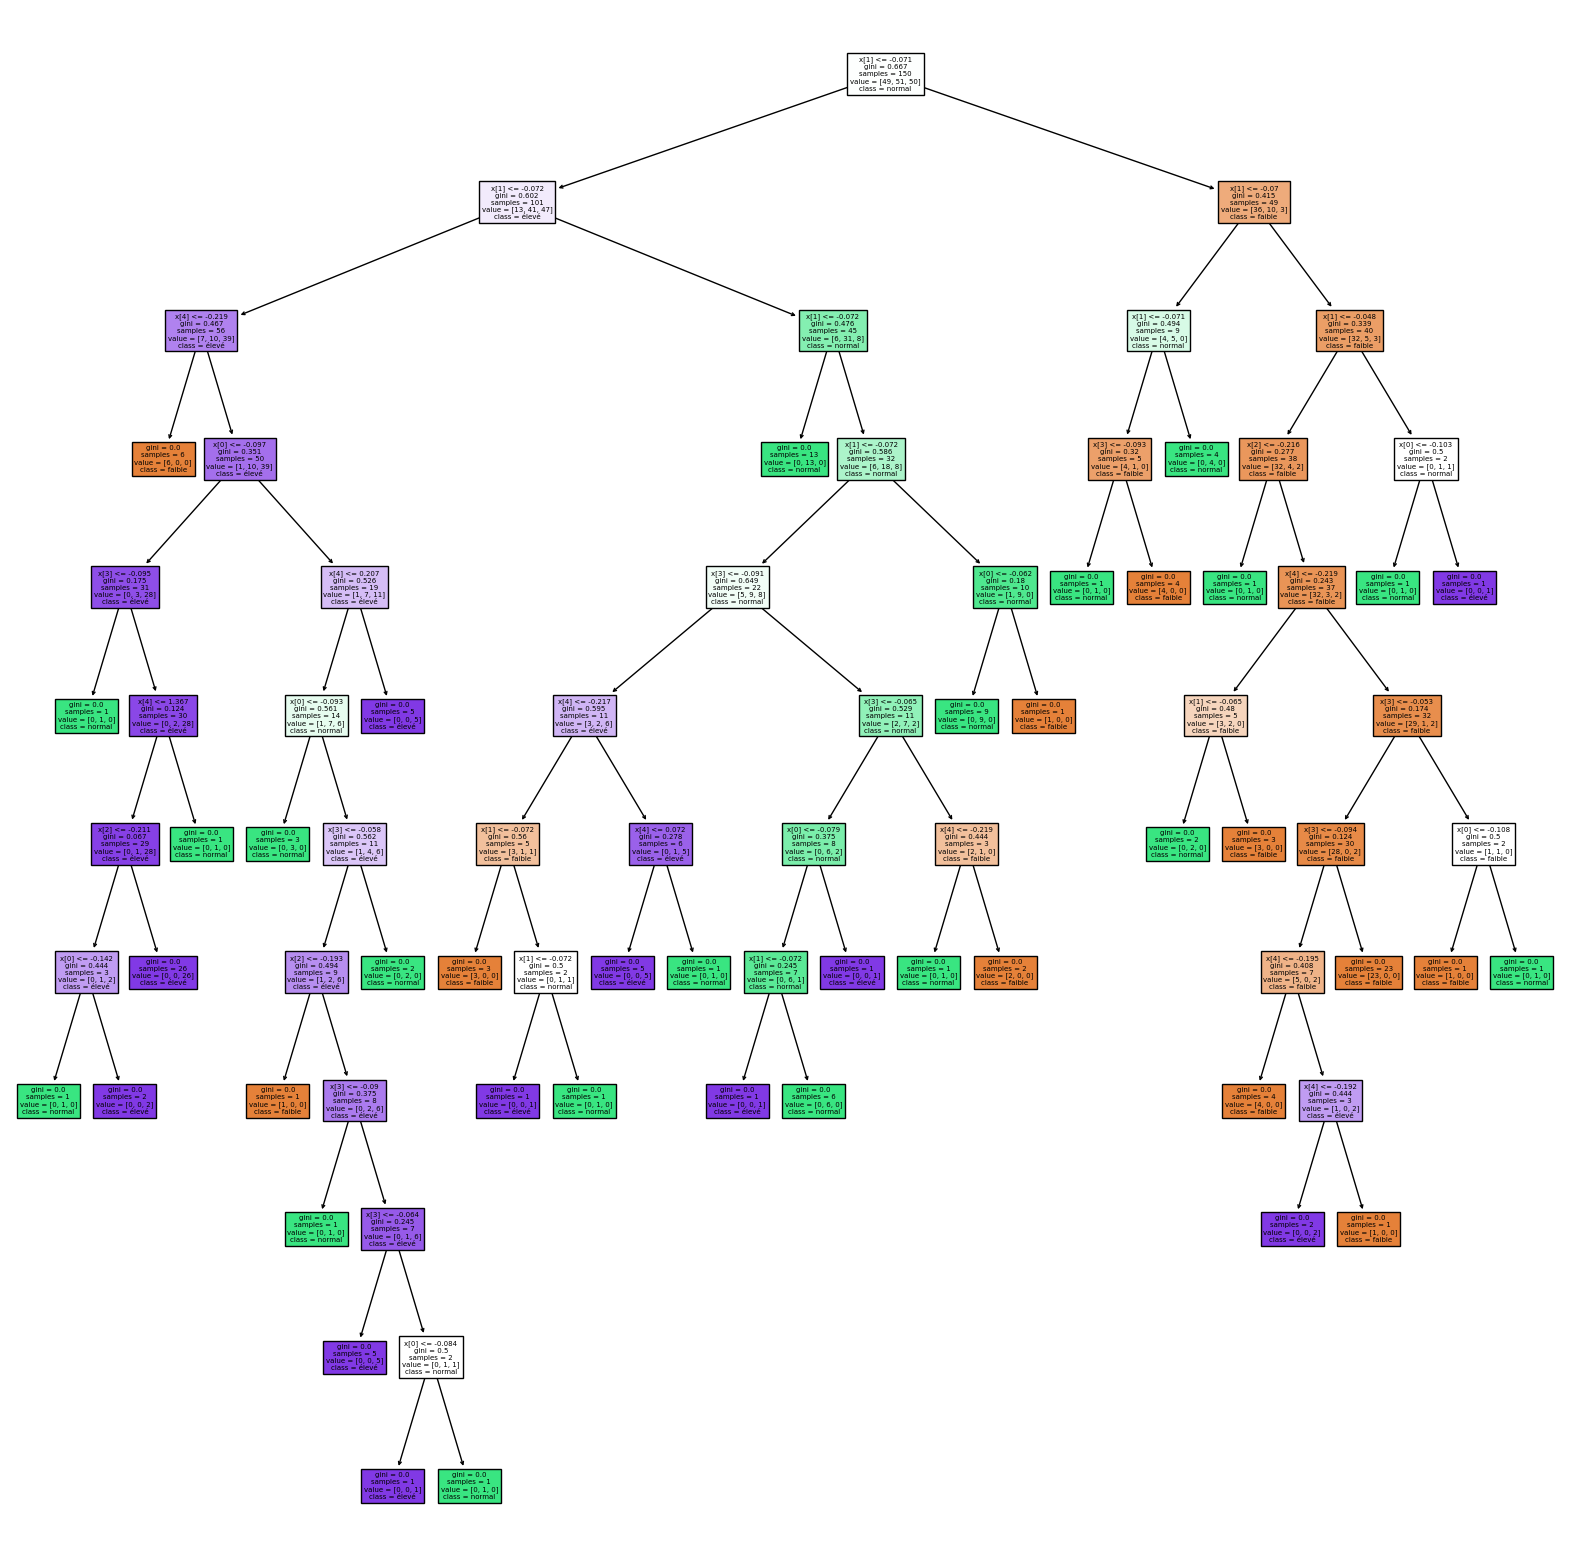

In [2512]:
plt.figure(figsize=(20,20))
try:
    from sklearn.tree import plot_tree

    _=plot_tree(dt,filled=True,class_names=["faible","normal","élevé"])
except ImportError:
    pass

+ Train a $K$-NN model with default parameters, using the raw dataset and another using the normalized dataset
+ Compare their results using an appropriate procedure and suitable measures+ Compare their performances 

In [2513]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
X=df_final
scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores = pd.DataFrame(scores).mean()



+ Apply a Z-score standardization to the dataset, and create another one.
+ Compute the same previous statistics

In [2514]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(X)
X_z = pd.DataFrame(zscore.transform(X), index=X.index, columns=X.columns)
X_z.describe()

,Agricultural land (% of land area),People practicing open defecation (% of population),Population density (people per sq. km of land area),Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent)
count,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02
mean,-8.262125e-18,2.891744e-17,2.478637e-17,-8.262125e-18,2.065531e-17
std,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00
min,-1.487913e-01,-7.182552e-02,-2.178114e-01,-9.532677e-02,-2.196801e-01
25%,-1.242306e-01,-7.182552e-02,-2.000183e-01,-9.281674e-02,-2.171664e-01
50%,-9.915289e-02,-7.170945e-02,-1.732673e-01,-8.421612e-02,-1.911568e-01
75%,-7.901736e-02,-6.989695e-02,-1.068281e-01,-6.990690e-02,-1.273236e-01
max,1.294362e+01,1.462367e+01,1.006558e+01,1.456061e+01,1.230063e+01


In [2515]:
y

0      faible
1      normal
2      normal
3      faible
4       élevé
        ...  
210    faible
211    normal
212     élevé
213    faible
214    faible
Name: Current health expenditure per capita (current US$), Length: 215, dtype: object

In [2516]:
knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X_z, y, scoring=scoring,cv=cv, return_train_score=True)
scores_knn = pd.DataFrame(scores_knn).mean()

<AxesSubplot: >

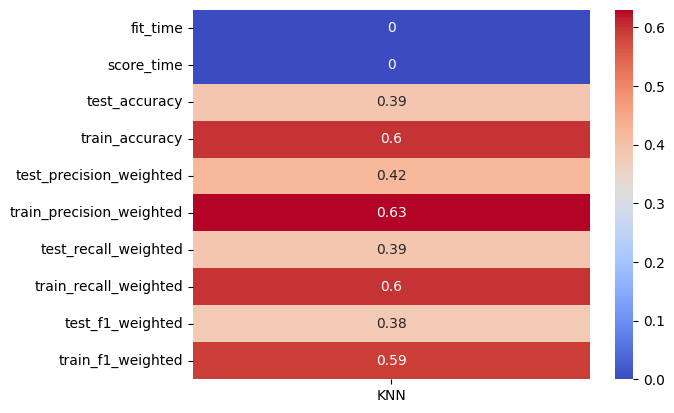

In [2517]:
import seaborn as sns
full_scores = pd.DataFrame({"KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

# Cross-validation

In [2518]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

+ Create a __stratified cross-validation__ splitter 

In [2519]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

+ You can also create a __normal cross-validation__ splitter

In [2520]:
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=5, shuffle=True)

+ Define a __list of evaluation metrics__ to assess

In [2521]:
y

0      faible
1      normal
2      normal
3      faible
4       élevé
        ...  
210    faible
211    normal
212     élevé
213    faible
214    faible
Name: Current health expenditure per capita (current US$), Length: 215, dtype: object

In [2522]:
scores=[]
X=df_final
scores = cross_validate(dt, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)
sklearn.model_selection.cross_validate(dt, X, y)
                               

{'fit_time': array([0.00100017, 0.00200009, 0.00100017, 0.00199986, 0.0010004 ]),
 'score_time': array([0.00100017, 0.00100064, 0.00100017, 0.00100088, 0.00099993]),
 'test_score': array([0.46511628, 0.65116279, 0.6744186 , 0.62790698, 0.69767442])}

0.6308559995269419


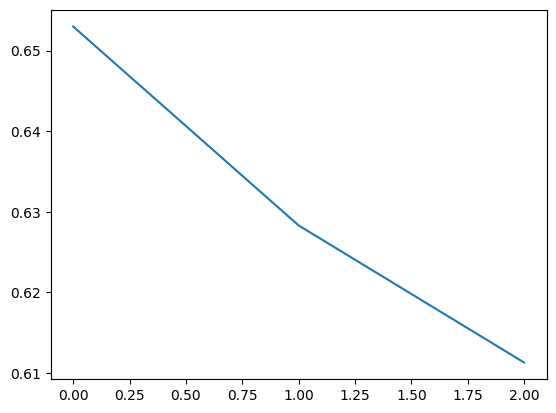

In [2523]:
scores=[]
X=df_final

cv=sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=None)
for train, test in cv.split(X, y):
    X_train=X.loc[train]
    y_train=y[train]
    X_test=X.loc[test]
    y_test=y[test]
    clf=dt.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores.append(sklearn.metrics.precision_score(y_test, y_pred, average='weighted')) # calcule la précision d'un modèle de classification en comparant les résultats prédits avec les valeurs réelles.
print(np.mean(scores))
plt.plot(scores)

## Overfitting

In [2524]:
# Test several maximum numbers of leaves
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
results = {}
for leaves in range(2,20):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pd.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pd.DataFrame(results)

Text(0.5, 0, 'Max Nb. Leaves (more complexe models on the right)')

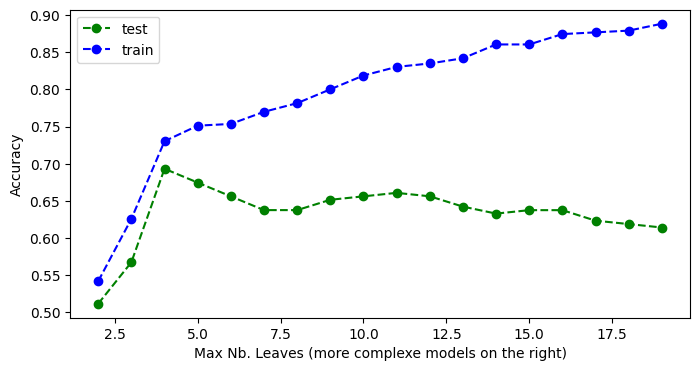

In [2525]:
plt.figure(figsize=(8, 4))
plt.plot(results_df.T.index,
         results_df.T["test_accuracy"], "go--", label="test")
plt.plot(results_df.T.index,
         results_df.T["train_accuracy"],"bo--", label="train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Nb. Leaves (more complexe models on the right)")

A partir d'ici ne pas prendre en compte 

In [2526]:
# importlib.reload(dm)

# df_nb_nan = dm.make_na_count(df)
# df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
# median = dm.compute_max_nan(df_nb_nan,0.5)
# plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
# plt.legend(loc='upper right')

On s'intéresse à la partie gauche du graphique (avec le moins de NaN possible). On voit qu'en à 50% des données (la médiane) on obtient une quantité de NaN de 5, ce qui est acceptable pour la quantité de données. On supprime ensuite les pays correspondans à la partie gauche du graphique.

In [2527]:
# importlib.reload(dm)

# df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
# print(df_step1_clean)

Construct a label by discretisation of an attribute (this label can be built by clustering the values of this attribute). Use this label as class label

In [2528]:
# import pandas as pd

# df = pd.DataFrame({'attribute': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# # Discretize the attribute into 3 bins
# df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# # View the resulting dataframe
# print(df)
# df=df_step1_clean

In [2529]:
# df=df_step1_clean
# df=df.iloc[1]
# import pandas as pd

# df = pd.DataFrame({'attribute': df})

# # Discretize the attribute into 3 bins
# df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# # View the resulting dataframe
# print(df)
# df=df_step1_clean


In [2530]:
# import pandas as pds
# import seaborn as sns
# import numpy as np
# from scipy import stats
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import matplotlib.pyplot as plt

In [2531]:
# #classes = df_step1_clean
# a=df_step1_clean.columns
# objects=df_step1_clean
# classes=[]
# for i in range(len(a)):
#     classes.append(a[i])
# df = pd.DataFrame(classes, columns = ['Name'])
# print(df)
# # objects = df.drop(['species'],axis=1)
# km=KMeans(n_clusters=3) # create a KMeans object



# objects.fillna(0, inplace=True) #rajouter des 0 a la place des NAN
# km.fit(objects) # compute the clusters
# centroids=km.cluster_centers_ # get the cluster centers
# print(centroids)


In [2532]:
# import pandas as pd
# from sklearn.cluster import KMeans

# # Chargement des données
# data = pd.read_csv("mon_fichier.csv")

# # Sélection de l'attribut à discrétiser
# attribute = data['ma_colonne']

# # Initialisation de l'algorithme de clustering K-means
# kmeans = KMeans(n_clusters=3)

# # Entraînement de l'algorithme sur l'attribut sélectionné
# kmeans.fit(attribute.values.reshape(-1, 1))

# # Récupération des labels de chaque valeur de l'attribut
# labels = kmeans.labels_

# # Ajout des labels comme colonne de classe dans les données
# data['class_label'] = labels

# # Affiche les données avec la nouvelle colonne de classe
# print(data)


In [2533]:
# ##########################autre en plus
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# objects = discretizer.transform(data)
# print(objects)
# km=KMeans(n_clusters=3) # create a KMeans object

# labels = km.predict()
# #labels = kmeans.fit_predict(X_binned)
# from sklearn.cluster import KMeans
# # réc
# objects=df.iloc[0]
# print(objects)

# # Créez une instance de la classe KMeans avec le nombre de clusters souhaité, ici on prend 3.
# km = KMeans(n_clusters=3)


# km.fit(objects) # calcul le cluster
# centroids=km.cluster_centers_ # get the cluster centers
# print(centroids)


# # # Fit the model to the attribute data
# # kmeans.fit(df[['attribute']])

# # # Add the cluster labels as a new column
# # df['label'] = kmeans.labels_

# # # Assign the label column as the class label
# # df['class'] = df['label']




# #############################fichier classification.py en copier coller
# ##############################################
# import pandas as pd

# #data = pd.read_csv("data.txt", sep="\t")
# #valeurmanquante=data.isna()
# #valeurmanquante.sum(axis=0)
# #print(valeurmanquante)
# ##############################################
# #import
# import pandas as pds
# import seaborn as sns
# import numpy as np
# from scipy import stats
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import matplotlib.pyplot as plt
# # #label by discretisation of an attribute
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# # data = pd.read_csv("data.txt", sep="\t")
# # data = data.drop(data.index[-5:])
# # print(data.tail())
# # # on a un tableau de données nommé "data" et je discrétiser la colonne d'indice 0

# # # supposons que vous avez un tableau de données nommé "X"
# # # et que vous souhaitez discrétiser la colonne d'indice 0

# # #centroids=km.cluster_centers_ # get the cluster centers
# # #print(centroids)
# # discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# # #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# # #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# # #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# # print(discretizer)
# # #avec un data numerique
# # data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# # a=discretizer.fit(data)# compute the clusters
# # print(a)
# # objects = discretizer.transform(data)
# # print(objects)
# # #objects = discretizer.fit_transform(data[:,0].reshape(-1, 1))

# # km=KMeans(n_clusters=3) # create a KMeans object

# # labels = km.predict()
# # #labels = kmeans.fit_predict(X_binned)

# # from sklearn.linear_model import LogisticRegression

# # # entraînez un modèle de régression logistique en utilisant les étiquettes comme étiquettes de classe
# # clf = LogisticRegression()
# # clf.fit(data, labels)

# #################yanis#############
# ###################################

# import pandas as pd
# import matplotlib.pyplot as plt
# import importlib
# import data_managment as dm

# importlib.reload(dm)
# originial_df = pd.read_csv("data.txt", sep="\t")
# df = dm.build_adapted_df(originial_df);df

# importlib.reload(dm)

# df_nb_nan = dm.make_na_count(df)
# df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
# median = dm.compute_max_nan(df_nb_nan,0.5)
# plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
# plt.legend(loc='upper right')

# importlib.reload(dm)

# df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
# print(df_step1_clean)

# import pandas as pd
# from sklearn.cluster import KMeans

# # Chargement des données
# data = pd.read_csv("mon_fichier.csv")

# # Sélection de l'attribut à discrétiser
# attribute = data['ma_colonne']

# # Remplacement des valeurs manquantes par 0
# attribute.fillna(0, inplace=True)

# # Initialisation de l'algorithme de clustering K-means
# kmeans = KMeans(n_clusters=3)

# # Entraînement de l'algorithme sur l'attribut sélectionné
# kmeans.fit(attribute.values.reshape(-1, 1))

# # Récupération des labels de chaque valeur de l'attribut
# labels = kmeans.labels_

# # Ajout des labels comme colonne de classe dans les données
# data['class_label'] = labels

# # Affiche les données avec la nouvelle colonne de classe
# print(data)

